Anemia:
    - Anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia can make you feel tired and weak.
    - anemia is typically defined as hemoglobin level of less than 13.5 gram/100 ml and in women as hemoglobin of less than 12.0 gram/100 ml.
    
creatine_phosphokinase:
    - When the total CPK level is very high, it most often means there has been injury or stress to muscle tissue.
    - normal values: 10 to 120 micrograms per liter (mcg/L)
diabetes:
    - A group of diseases that result in too much sugar in the blood (high blood glucose).
    - A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.
ejection_fraction: 
    - Ejection fraction is a measurement of the percentage of blood leaving your heart each time it contracts.
    - A normal heart's ejection fraction may be between 50 and 70 percent. You can have a normal ejection fraction measurement and still have heart failure (called HFpEF or heart failure with preserved ejection fraction).
    
platelets:
    - Platelets are tiny blood cells that help your body form clots to stop bleeding. If one of your blood vessels gets damaged,it sends out signals to the platelets. The platelets then rush to the site of damage. they form a plug (clot) to fix the damage.
    - The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.
    
serum_creatinine:
    - A serum creatinine test measures the level of creatinine in your blood and provides an estimate of how well your kidneys filter (glomerular filtration rate). A creatinine urine test can measure creatinine in your urine.
    - Creatinine levels that reach 2.0 or more in babies and 5.0 or more in adults may indicate severe kidney impairment.
    
serum_sodium:
    - A sodium blood test is a routine test that allows your doctor to see how much sodium is in your blood.
    - Sodium is particularly important for nerve and muscle function.
    - A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.
    

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df= pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [78]:
#check for null-values

In [79]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [81]:

sns.set(style='darkgrid')
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feature_importances= pd.Series(model.feature_importances_, index= x.columns)

[0.09304379 0.02515438 0.07180451 0.03006321 0.13652394 0.02510045
 0.07404853 0.1106116  0.07954179 0.02677856 0.02778561 0.29954362]


In [82]:
""""forest= ExtraTreesClassifier()
forest.fit(x,y)
importances= forest.feature_importances_"""

'"forest= ExtraTreesClassifier()\nforest.fit(x,y)\nimportances= forest.feature_importances_'

In [83]:
x.shape[1]

12

In [84]:
model

ExtraTreesClassifier()

In [85]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Feature Ranking
1 anaemia. (0.299544) 
2 creatinine_phosphokinase. (0.136524) 
3 diabetes. (0.110612) 
4 ejection_fraction. (0.093044) 
5 high_blood_pressure. (0.079542) 
6 platelets. (0.074049) 
7 serum_creatinine. (0.071805) 
8 serum_sodium. (0.030063) 
9 sex. (0.027786) 
10 smoking. (0.026779) 
11 time. (0.025154) 
12 DEATH_EVENT. (0.025100) 


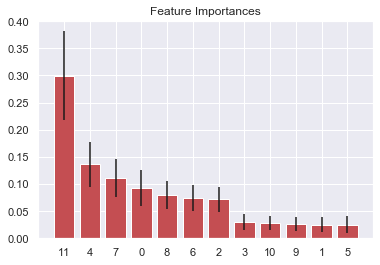

In [86]:
std= np.std([tree.feature_importances_ for tree in model.estimators_], axis= 0)
indices= np.argsort(feature_importances)[::-1]
print("Feature Ranking")

for f in range(x.shape[1]):
    print("%d %s. (%f) "%(f+1,df.columns[f+1], feature_importances[indices[f]]))
plt.figure()
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), feature_importances[indices], color='r',yerr= std[indices], align= 'center')
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [87]:
# so from here we can see that there are only three important features 11,4,7

## Finding outliers:

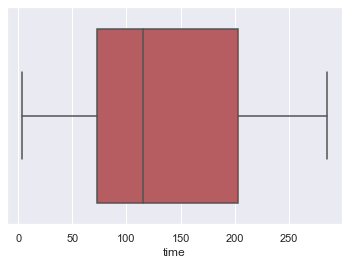

In [88]:
# Box-plot for time
sns.boxplot(x= 'time',color= 'r', data= df)

In [89]:
# we can see there are no outliers in time.

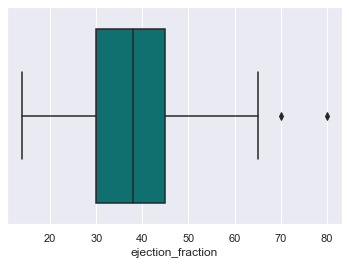

In [90]:
sns.boxplot(x= 'ejection_fraction', color= 'teal', data= df)

In [91]:
# we can see there are two outliers, we have to remove them.

In [92]:
ejection_outlier= df[df['ejection_fraction']>= 70]
ejection_outlier

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [93]:
df = df[df['ejection_fraction']<70]


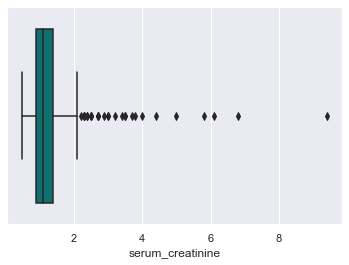

In [94]:
sns.boxplot(x= 'serum_creatinine', color= 'teal', data= df)

In [96]:
# we know that cerum creatinine test shows that 5.0 or more in adults may indicate severe kidney impairment, 
#so these are not outliers.

## DEEPER INSIGHT:

In [116]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( # bins used for histogram
        start=df['age'].min(),
        end=df['age'].max(),
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1, 
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.06, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [117]:
import plotly.express as px
fig= px.histogram(df, x="age", color="DEATH_EVENT", marginal= "violin", hover_data= df.columns,
                 title= "Distribution of the age vs death event",
                 labels={'age':"AGE"},
                 template= 'plotly_dark',
                 color_discrete_map= {'0':"RebeccaPurple", '1':"MediumPurple"})
fig.show()

In [135]:
# death vs anaemia

In [138]:
import plotly.graph_objs as go

d1= df[(df['DEATH_EVENT']==0)&(df['anaemia']==0)]
d2= df[(df['DEATH_EVENT']==0)&(df['anaemia']==1)]
d3= df[(df['DEATH_EVENT']==1)&(df['anaemia']==0)]
d4= df[(df['DEATH_EVENT']==1)&(df['anaemia']==1)]

labels= ['No anaemia- No Death', 'Anaemia- No Death', 'No anaemia- Death', 'Anaemia- Death']
values= [len(d1), len(d2), len(d3), len(d4)]
colors= ['#91b557', '#f54251', '#91b557', '#f54251']

fig= go.Figure(data= [go.Pie(labels= labels, values= values)])
fig.update_layout(title_text= 'Anaemia vs Death')
fig.update_traces(marker= dict(colors= colors, line= dict(color= '#57b5a7', width= 1)))
fig.show()

#Creatine Phosephokinase

In [154]:
df['creatinine_phosphokinase'].max()

7861

In [156]:
#distribution of creatinine phosphokinase
import plotly.graph_objects as go
fig= go.Figure()
fig.add_trace(go.Histogram(x= df['creatinine_phosphokinase'],
                          xbins= dict(start= df['creatinine_phosphokinase'].min(), 
                                      end= 1200, size= 15), marker_color= '#FE6F5E',
                          opacity= 1))
fig.update_layout(title_text= 'CRETININE PHOSPHOKINASE DISTRIBUTION',
                 xaxis_title_text= 'creatinine phosphokinase',
                 yaxis_title_text= 'Count',bargap= 0.06, template= 'plotly_dark',
                 xaxis =  {'showgrid': False },
                  yaxis = {'showgrid': False })
fig.show()

In [143]:
import plotly.express as px
fig= px.histogram(df, x= 'creatinine_phosphokinase', color= 'DEATH_EVENT', marginal= 'violin', hover_data= df.columns)
fig.update_layout(title_text= 'Distribution of creatinine phosphokinase vs Death', template= 'plotly_dark')
fig.show()

In [118]:
# death vs diabetes

In [139]:
import plotly.graph_objs as go

d1= df[(df['DEATH_EVENT']==0)&(df['diabetes']==0)]
d2= df[(df['DEATH_EVENT']==0)&(df['diabetes']==1)]
d3= df[(df['DEATH_EVENT']==1)&(df['diabetes']==0)]
d4= df[(df['DEATH_EVENT']==1)&(df['diabetes']==1)]

labels= ['No diabetes- No death', 'No diabetes- Death', 'Diabetes- No death', 'Diabetes- Death']
values= [len(d1), len(d2), len(d3), len(d4)]
colors = ['#229987', '#400080', '#229987', '#400080']

fig= go.Figure(data= [go.Pie(labels= labels, values= values)])
fig.update_layout(title_text= 'Diabetes vs Death')
fig.update_traces(marker= dict(colors= colors, line=dict(color= '#000000', width=1)))
fig.show()

In [144]:
# death vs ejection_fraction

In [161]:
# distribution of ejection fraction
import plotly.graph_objects as go
fig= go.Figure()
fig.add_trace(go.Histogram(x= df['ejection_fraction'],
                          xbins= dict(start= df['ejection_fraction'].min(),
                                     end= df['ejection_fraction'].max(),
                                     size= 2),
                          marker_color= '#49505c', opacity= 1))
fig.update_layout(title_text= 'EJECTION FRACTION DISTRIBUTION',
                 xaxis_title_text= 'ejection fraction',
                 yaxis_title_text= 'Count', bargap= 0.06,
                 xaxis= {'showgrid':False}, yaxis= {'showgrid':False}, 
                 template= 'plotly_dark')
fig.show()

In [149]:

fig= px.histogram(df, x= 'ejection_fraction', color= 'DEATH_EVENT', marginal= 'violin', hover_data= df.columns)
fig.update_layout(title= 'Level of ejection of blood vs Death', template= 'plotly_dark')
fig.show()

In [162]:
# platelets vs death

In [164]:
# distribution of plateletes
import plotly.graph_objects as go
fig= go.Figure()
fig.add_trace(go.Histogram(x= df['platelets'],
             xbins= dict(
             start= df['platelets'].min(),
             end= df['platelets'].max(),
             size= 5000), marker_color= '#99c2ab', opacity= 1))
fig.update_layout(title_text= 'PLATELETS DISTRIBUTION',
                 xaxis_title_text= 'Platelets',
                 yaxis_title_text= 'Count',
                 bargap= 0.06,
                 xaxis= {'showgrid':False}, yaxis= {'showgrid':False}, template= 'plotly_dark')

fig.show()

In [166]:
import plotly.express as px
fig= px.histogram(df, x= 'platelets', color= 'DEATH_EVENT',marginal= 'violin', hover_data= df.columns)
fig.update_layout(title_text= 'Count of platelets cells vs death', template= 'plotly_dark')
fig.show()

In [168]:

# Distribution of serum_creatinine

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['serum_creatinine'],
    xbins=dict( # bins used for histogram
        start=df['serum_creatinine'].min(),
        end=df['serum_creatinine'].max(),
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='SERUM CREATININE DISTRIBUTION',
    xaxis_title_text='SERUM CREATININE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [169]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [170]:
# Distribution of serum_sodium

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['serum_sodium'],
    xbins=dict( # bins used for histogram
        start=df['serum_sodium'].min(),
        end=df['serum_sodium'].max(),
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='SERUM SODIUM DISTRIBUTION',
    xaxis_title_text='SERUM SODIUM',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [171]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=df.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [172]:
import plotly.graph_objs as go

d1= df[(df['DEATH_EVENT']==0)&(df['sex']==0)]
d2= df[(df['DEATH_EVENT']==0)&(df['sex']==1)]
d3= df[(df['DEATH_EVENT']==1)&(df['sex']==0)]
d4= df[(df['DEATH_EVENT']==1)&(df['sex']==1)]

labels= ['Women- No Death', 'Women- Death', 'Man- No Death', 'Man- Death']
values= [len(d1), len(d2), len(d3), len(d4)]
colors= colors = ['#00bb00', '#500080', '#00bb00', '#500080']

fig= go.Figure(data= [go.Pie(labels= labels, values= values)])
fig.update_layout(title_text= 'Sex wise Death')
fig.update_traces(marker= dict(colors= colors, line= dict(color= '#000000', width=1)))
fig.show()

In [174]:
# ANALYSIS OF DEATH_EVENT VS HIGH BLOOD PRESSURE
import plotly.graph_objs as go

d1 = df[(df["DEATH_EVENT"]==0) & (df["high_blood_pressure"]==0)]
d2 = df[(df["DEATH_EVENT"]==0) & (df["high_blood_pressure"]==1)]
d3 = df[(df["DEATH_EVENT"]==1) & (df["high_blood_pressure"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["high_blood_pressure"]==1)]

labels = ['No High BP - No Death','High BP - No Death', "No High BP -  Death", "High BP  - Death"]
values = [len(d1),len(d2),len(d3),len(d4)]

colors = ['#00cc00', '#400080', '#00cc00', '#400080']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="ANALYSIS OF DEATH_EVENT VS HIGH BLOOD PRESSURE")
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.show()

In [176]:
# death event vs smoking habit
import plotly.graph_objs as go

d1 = df[(df["DEATH_EVENT"]==0) & (df["smoking"]==0)]
d2 = df[(df["DEATH_EVENT"]==0) & (df["smoking"]==1)]
d3 = df[(df["DEATH_EVENT"]==1) & (df["smoking"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["smoking"]==1)]

labels = ['No Smoking - Survived','Smoking - Survived', "No Smoking -  Died", "Smoking  - Died"]
values = [len(d1),len(d2),len(d3),len(d4)]

colors = ['#00cc00', '#400080', '#00cc00', '#400080']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="ANALYSIS OF DEATH_EVENT VS SMOKING")
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.show()

In [177]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(df, x="age", color="diabetes", marginal="violin",hover_data=df.columns,
                   title ="Distribution of AGE Vs DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [178]:
 #"Distribution of AGE Vs ANAEMIA"
import plotly.express as px
fig = px.histogram(df, x="age", color="anaemia", marginal="violin",hover_data=df.columns,
                   title ="Distribution of AGE Vs ANAEMIA", 
                   labels={"anaemia": "ANAEMIA", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [179]:
# "Distribution of AGE Vs HIGH BLOOD PRESSURE"
import plotly.express as px
fig = px.histogram(df, x="age", color="high_blood_pressure", marginal="violin",hover_data=df.columns,
                   title ="Distribution of AGE Vs HIGH BLOOD PRESSURE", 
                   labels={"high_blood_pressure": "HIGH BLOOD PRESSURE", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [180]:
# "Distribution of AGE Vs SMOKING"
import plotly.express as px
fig = px.histogram(df, x="age", color="smoking", marginal="violin",hover_data=df.columns,
                   title ="Distribution of AGE Vs SMOKING", 
                   labels={"smoking": "SMOKING", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [182]:
x = df.iloc[:, [4,7,11]].values
y = df.iloc[:,-1].values

In [184]:
x

array([[ 20.  ,   1.9 ,   4.  ],
       [ 38.  ,   1.1 ,   6.  ],
       [ 20.  ,   1.3 ,   7.  ],
       [ 20.  ,   1.9 ,   7.  ],
       [ 20.  ,   2.7 ,   8.  ],
       [ 40.  ,   2.1 ,   8.  ],
       [ 15.  ,   1.2 ,  10.  ],
       [ 60.  ,   1.1 ,  10.  ],
       [ 65.  ,   1.5 ,  10.  ],
       [ 35.  ,   9.4 ,  10.  ],
       [ 38.  ,   4.  ,  10.  ],
       [ 25.  ,   0.9 ,  10.  ],
       [ 30.  ,   1.1 ,  11.  ],
       [ 38.  ,   1.1 ,  11.  ],
       [ 30.  ,   1.  ,  12.  ],
       [ 50.  ,   1.3 ,  13.  ],
       [ 38.  ,   0.9 ,  14.  ],
       [ 14.  ,   0.8 ,  14.  ],
       [ 25.  ,   1.  ,  15.  ],
       [ 55.  ,   1.9 ,  15.  ],
       [ 25.  ,   1.3 ,  16.  ],
       [ 30.  ,   1.6 ,  20.  ],
       [ 35.  ,   0.9 ,  20.  ],
       [ 60.  ,   0.8 ,  22.  ],
       [ 30.  ,   1.83,  23.  ],
       [ 38.  ,   1.9 ,  23.  ],
       [ 40.  ,   1.  ,  24.  ],
       [ 45.  ,   1.3 ,  26.  ],
       [ 38.  ,   5.8 ,  26.  ],
       [ 30.  ,   1.2 ,  26.  ],
       [ 3

In [185]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [186]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [187]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

# 1. LOGISTIC REGRESSION

In [188]:
# Applying logistic regression on the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [189]:
# Predicting the test set

y_pred = classifier.predict(x_test)
# Making Confusion Matrix and calculating accuracy score

mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  3]
 [ 4 13]]
0.8833333333333333


# 2. K NEAREST NEIGHBOR

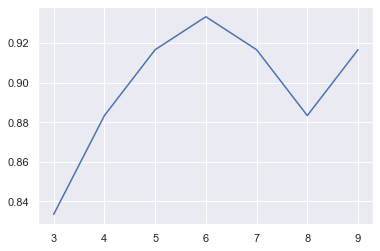

In [190]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()


In [191]:
# we can see that it is performing very well on n_neighbors=6
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [192]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)


[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [193]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[42  1]
 [ 3 14]]
0.9333333333333333


# 3. SUPPORT VECTOR CLASSIFIER

In [194]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0]
[[39  4]
 [ 3 14]]
0.8833333333333333


# 4. DECISION TREE CLASSIFIER

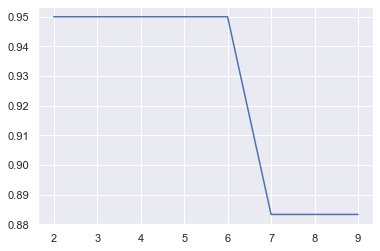

In [195]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,10)), list1)
plt.show()

In [196]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [197]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[43  0]
 [ 3 14]]
0.95


# 5. RANDOM FOREST CLASSIFCATION

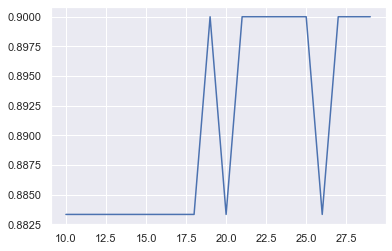

In [198]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='gini')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [200]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 22, criterion='gini', random_state=0)
classifier.fit(x_train,y_train)


# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)


[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0]


In [201]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[39  4]
 [ 2 15]]
0.9


# 6. ANN 

In [202]:
np.random.seed(0)
import tensorflow as tf

# Initialising the ANN

ann = tf.keras.models.Sequential()

In [203]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [204]:
# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))


In [205]:
# Adding the third hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))


In [206]:
# Adding the fourth hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))


In [207]:
# Adding the output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [208]:
# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [209]:
# Training the ANN on the training set

ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 0s 11ms/step - loss: 0.7347 - accuracy: 0.3418
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.3376
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.3460
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4388
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5654
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.6962
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.7468
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.7511
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.7595
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.7637
Epoch 11/100
8/8 [==========

8/8 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8439
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8481
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8481
Epoch 87/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8523
Epoch 88/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8481
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8523
Epoch 90/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.8523
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8565
Epoch 92/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8565
Epoch 93/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8523
Epoch 94/100
8/8 [===============

In [210]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [211]:
# Making the confusion matrix, calculating accuracy_score 

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac)
mylist.append(ac)

Confusion Matrix
[[41  2]
 [ 2 15]]

Accuracy
0.9333333333333333


# 7. XGBCALSSIFIER

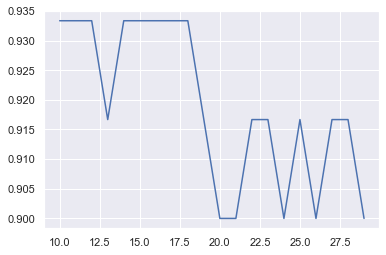

In [212]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [213]:
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators=15, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method=None, validate_parameters=False, verbosity=None)

In [214]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [215]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[41  2]
 [ 2 15]]
0.9333333333333333


In [217]:
# Plotting accuracy score of different models
mylist

[0.8833333333333333,
 0.9333333333333333,
 0.8833333333333333,
 0.95,
 0.9,
 0.9333333333333333,
 0.9333333333333333]

In [218]:
mylist2 = ["Logistic Regression", "KNearestNeighbours","SupportVector","DecisionTree","RandomForest","ANN", "XGBOOST"]

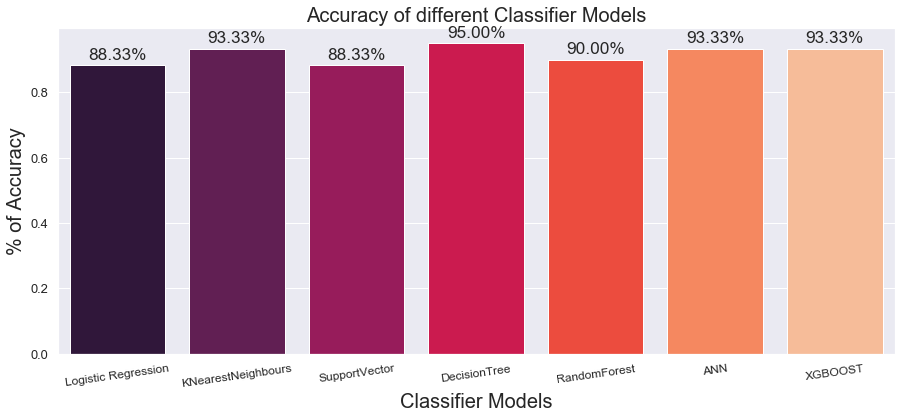

In [219]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [220]:
# we can see that our decision tree model performs well on this dataset.